In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, MaxPool2D, Conv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
target = 'label'
y = df[target]
X = df.drop(target, axis=1)

In [5]:
lb = LabelBinarizer()
lb.fit_transform(y)

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [6]:
y = to_categorical(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

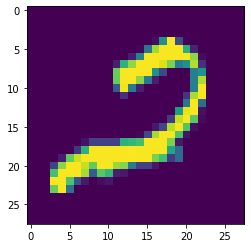

In [10]:
plt.imshow(X_train[500][:,:,0]);

In [12]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3),
                 activation ='relu'))
model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3),
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), 
                    strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [13]:
model.compile(loss = "categorical_crossentropy",optimizer='adam', metrics=["accuracy"])

In [49]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 106s 3ms/sample - loss: 0.0557 - accuracy: 0.9847 - val_loss: 0.0451 - val_accuracy: 0.9878
Epoch 2/5
31500/31500 [==============================] - 101s 3ms/sample - loss: 0.0576 - accuracy: 0.9845 - val_loss: 0.0379 - val_accuracy: 0.9883
Epoch 3/5
31500/31500 [==============================] - 103s 3ms/sample - loss: 0.0474 - accuracy: 0.9864 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 4/5
31500/31500 [==============================] - 114s 4ms/sample - loss: 0.0476 - accuracy: 0.9870 - val_loss: 0.0307 - val_accuracy: 0.9914
Epoch 5/5
31500/31500 [==============================] - 112s 4ms/sample - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0411 - val_accuracy: 0.9891


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)         

In [16]:
model.evaluate(X_test, y_test)

10500/10500 [==============================] - 10s 933us/sample - loss: 0.0319 - accuracy: 0.9904


[0.0319010417748754, 0.99038094]

In [17]:
df_test = pd.read_csv('data/test.csv')

In [22]:
df_test=scaler.transform(df_test)

In [25]:
df_test = df_test.reshape(df_test.shape[0], 28, 28, 1)

In [27]:
y_hat=model.predict(df_test)

In [29]:
data=pd.read_csv('data/train.csv')

In [31]:
new=data['Label']

In [32]:
new=lb.fit_transform(new)

In [37]:
read=pd.DataFrame(lb.inverse_transform(np.array(y_hat)))

In [38]:
read=read.reset_index()

In [39]:
read.columns=['ImageId', 'Label']

In [45]:
read['ImageId']=read['ImageId']+1

In [46]:
read.to_csv('results.csv', header=True, index=False)

In [47]:
df1 = pd.read_csv('results.csv')

In [48]:
df1

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
